In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
print(tf.__version__)

2.3.0


In [4]:
# We need to get some labeled training data!
mnist = tf.keras.datasets.fashion_mnist

In [5]:
rv = mnist.load_data()

In [6]:
print(rv)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [7]:
(train_images, train_labels) = rv[0]

In [8]:
(test_images, test_labels) = rv[1]

In [9]:
print(test_images.shape)

(10000, 28, 28)


<IPython.core.display.Javascript object>


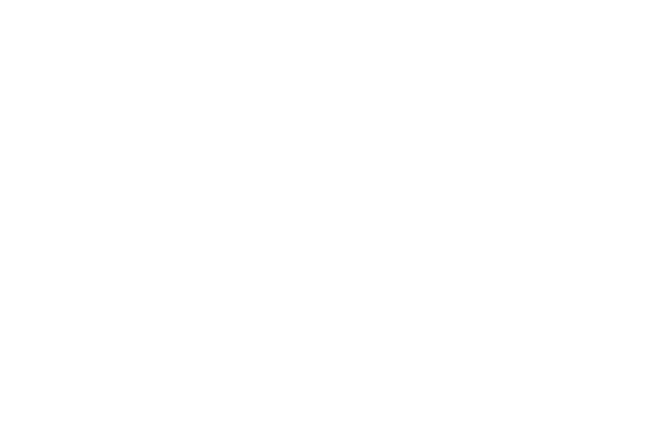

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[8000],cmap=plt.cm.binary)

In [11]:
print(train_labels)

[9 0 0 ... 3 0 5]


<IPython.core.display.Javascript object>


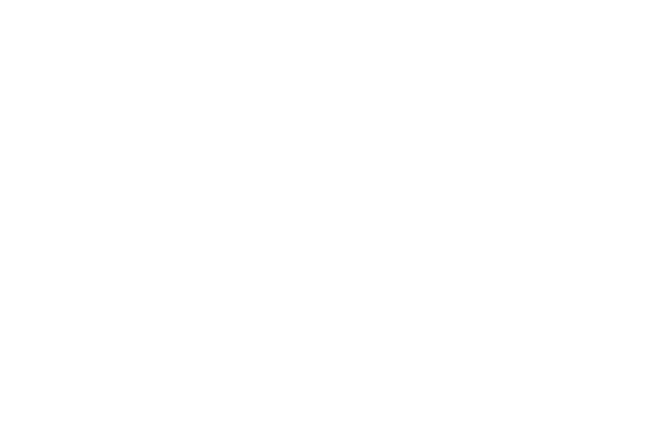

In [12]:
%matplotlib notebook
plt.figure()
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [13]:
class_names = ['Tops', 'Bottoms', 'Sweaters', 'Dresses', 'Coats', 'Open-Toed Shoes', 'Long Sleeve Tops', 'Sneaker', 'Bags', 'Boot']

In [14]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(128,activation='relu'),tf.keras.layers.Dense(10)])

In [15]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 83s 44ms/step - loss: 3.5115 - accuracy: 0.6718
Epoch 2/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.7596 - accuracy: 0.7126
Epoch 3/10
1875/1875 [==============================] - 203s 108ms/step - loss: 0.6358 - accuracy: 0.7546
Epoch 4/10
1875/1875 [==============================] - 201s 107ms/step - loss: 0.5851 - accuracy: 0.7849
Epoch 5/10
1875/1875 [==============================] - 222s 118ms/step - loss: 0.5290 - accuracy: 0.8167
Epoch 6/10
1875/1875 [==============================] - 190s 101ms/step - loss: 0.4992 - accuracy: 0.8258
Epoch 7/10
1875/1875 [==============================] - 200s 107ms/step - loss: 0.4918 - accuracy: 0.8294
Epoch 8/10
1875/1875 [==============================] - 193s 103ms/step - loss: 0.4898 - accuracy: 0.8306
Epoch 9/10
1875/1875 [==============================] - 182s 97ms/step - loss: 0.4839 - accuracy: 0.8329
Epoch 10/10
1875/1875 [===========================

In [17]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 15s - loss: 0.5268 - accuracy: 0.8238


[0.5268434286117554, 0.8238000273704529]

In [18]:
test_images_norm = test_images / 255.0
train_images_norm = train_images / 255.0

In [19]:
model2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(128,activation='relu'),tf.keras.layers.Dense(10)])
model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [20]:
model2.fit(train_images_norm, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 205s 109ms/step - loss: 0.4951 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.3732 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.3376 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.3139 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2969 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2802 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.2684 - accuracy: 0.89990s - loss: 0.2686 - accuracy: 
Epoch 8/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2565 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2474 - accuracy: 0.9072
Epoch 10/10
1875/1875 [========

In [21]:
model2.evaluate(test_images_norm, test_labels, verbose=2)

313/313 - 5s - loss: 0.3311 - accuracy: 0.8819


[0.33106178045272827, 0.8819000124931335]

In [22]:
probability_model2 = tf.keras.Sequential([model2,tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model2.predict(test_images_norm)

In [24]:
print(predictions[0])

[1.0296058e-07 2.4495827e-07 7.0272129e-08 5.6746281e-08 2.9555443e-07
 6.3585263e-04 3.6394904e-06 1.1826374e-02 3.3858342e-08 9.8753321e-01]


<IPython.core.display.Javascript object>


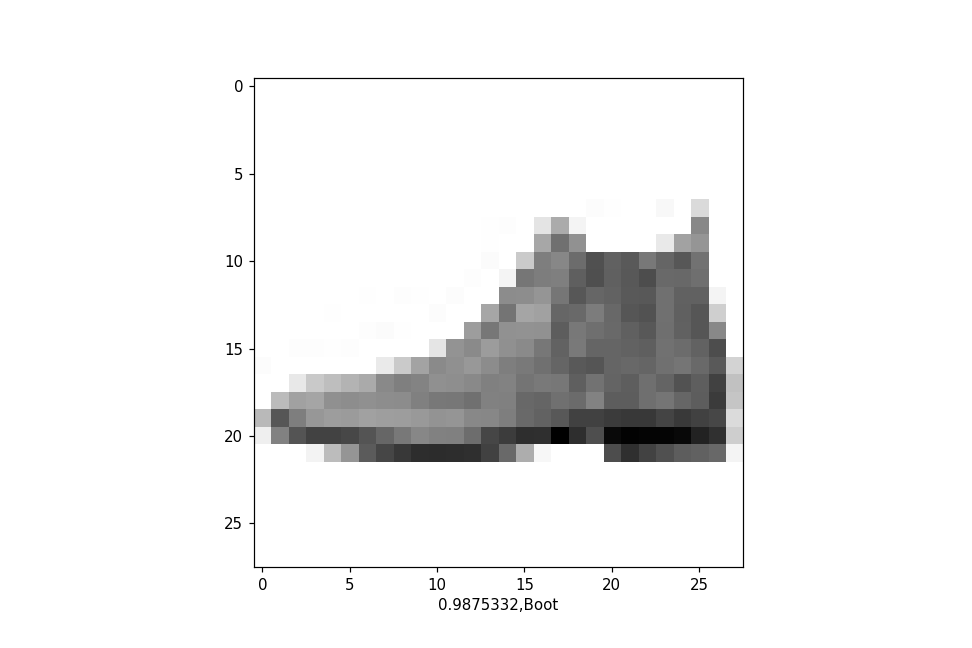

Text(0.5, 0, '0.9875332,Boot')

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.xlabel(str(predictions[0][np.argmax(predictions[0])])+","+str(class_names[np.argmax(predictions[0])]))